In [44]:
import pandas as pd
import numpy as np
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

target = train.iloc[:, -1]


train.drop(train.columns[-1], axis=1, inplace=True)
train_id = train['Id']
test_id = test['Id']
train.drop('Id',axis=1, inplace=True)
test.drop('Id',axis=1, inplace=True)

benchmark = pd.read_csv('sample_submission.csv')
target_benchmark = benchmark.iloc[:, -1]

In [46]:
type(target)

pandas.core.series.Series

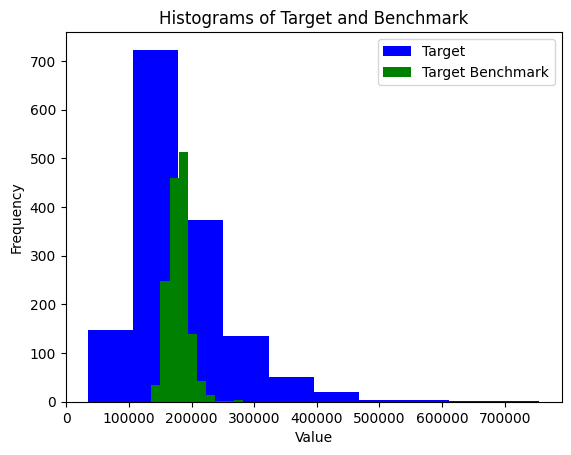

In [43]:
plt.hist(target, label='Target', color='blue')
plt.hist(target_benchmark, label='Target Benchmark', color='green')

plt.title('Histograms of Target and Benchmark')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()

(array([ 35., 248., 459., 513., 140.,  43.,  14.,   2.,   2.,   3.]),
 array([135751.31889282, 150340.58461521, 164929.85033761, 179519.11606001,
        194108.3817824 , 208697.6475048 , 223286.9132272 , 237876.1789496 ,
        252465.44467199, 267054.71039439, 281643.97611679]),
 <BarContainer object of 10 artists>)

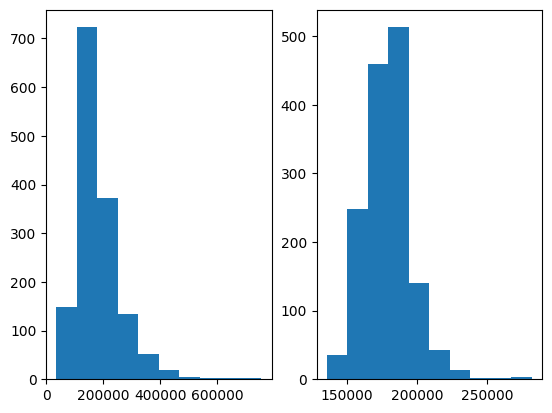

In [24]:
fig , ax = plt.subplots(1, 2)

ax[0].hist(target)
ax[1].hist(target_benchmark)

Both the target and benchmark have right skews and distribution varies greatly

In [25]:
target_benchmark.describe()

count      1459.000000
mean     179183.918243
std       16518.303051
min      135751.318893
25%      168703.011202
50%      179208.665698
75%      186789.409363
max      281643.976117
Name: SalePrice, dtype: float64

In [26]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Descriptive statistics for sales price of benchmark and target sale prices differ greatly

In [27]:
target = np.log1p(target)
target_benchmark = np.log1p(target_benchmark)
#log transformation to make meaningful metric comparison


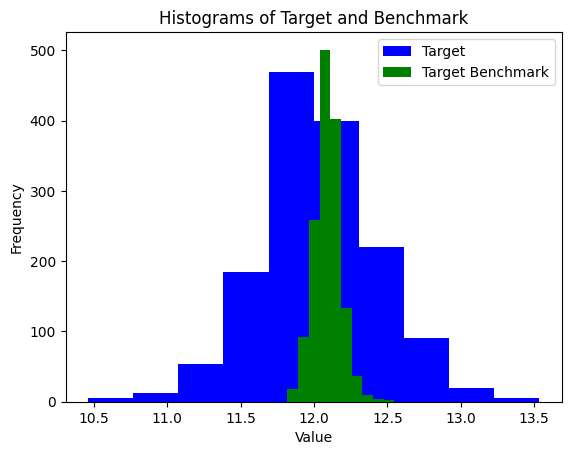

In [39]:
plt.hist(target, label='Target', color='blue')
plt.hist(target_benchmark, label='Target Benchmark', color='green')

plt.title('Histograms of Target and Benchmark')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()

(array([ 18.,  92., 259., 501., 402., 134.,  37.,   9.,   4.,   3.]),
 array([11.81858732, 11.89156885, 11.96455038, 12.03753191, 12.11051343,
        12.18349496, 12.25647649, 12.32945802, 12.40243955, 12.47542108,
        12.54840261]),
 <BarContainer object of 10 artists>)

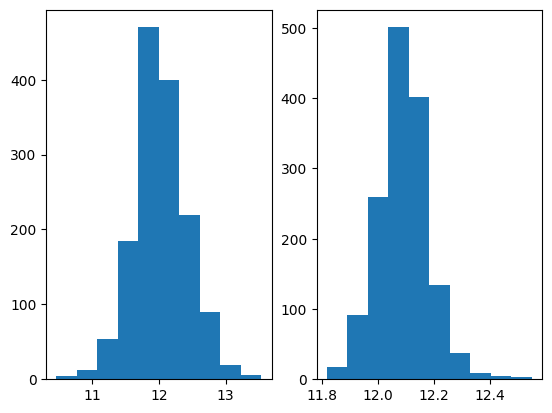

In [40]:
fig , ax = plt.subplots(1, 2)
ax[0].hist(target)
ax[1].hist(target_benchmark)

In [37]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

for col in train.columns: 
    missing = sum(train[col].isnull())
    if missing > 0:
        print('{}-{}'.format(col, missing))


LotFrontage-259
MasVnrArea-8
GarageYrBlt-81


In [38]:
for col in test.columns: 
    missing = sum(test[col].isnull())
    if missing > 0:
        print('{}-{}'.format(col, missing))

LotFrontage-227
MasVnrArea-15
BsmtFinSF1-1
BsmtFinSF2-1
BsmtUnfSF-1
TotalBsmtSF-1
BsmtFullBath-2
BsmtHalfBath-2
GarageYrBlt-78
GarageCars-1
GarageArea-1


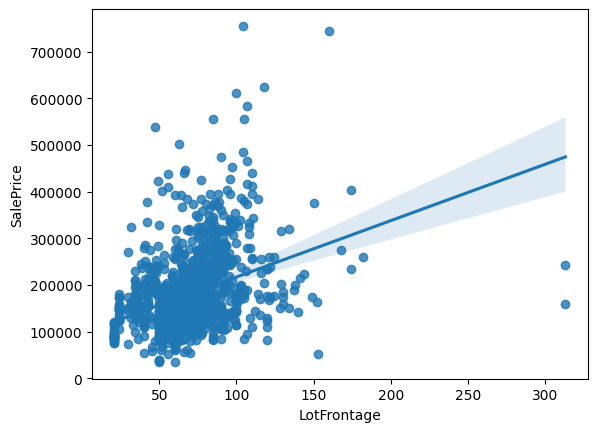

In [47]:
sns.regplot(x=train['LotFrontage'], y=target)
plt.show()

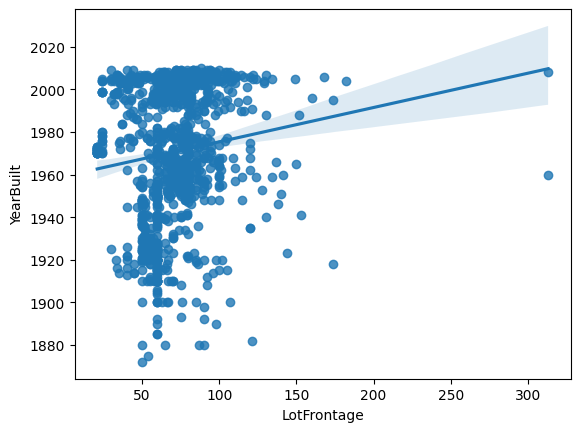

In [48]:
sns.regplot(x=train['LotFrontage'], y=train['YearBuilt'])
plt.show()